In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Facebook_Marketplace_data.csv")

## 1. Effect of Time on 'num_reactions'

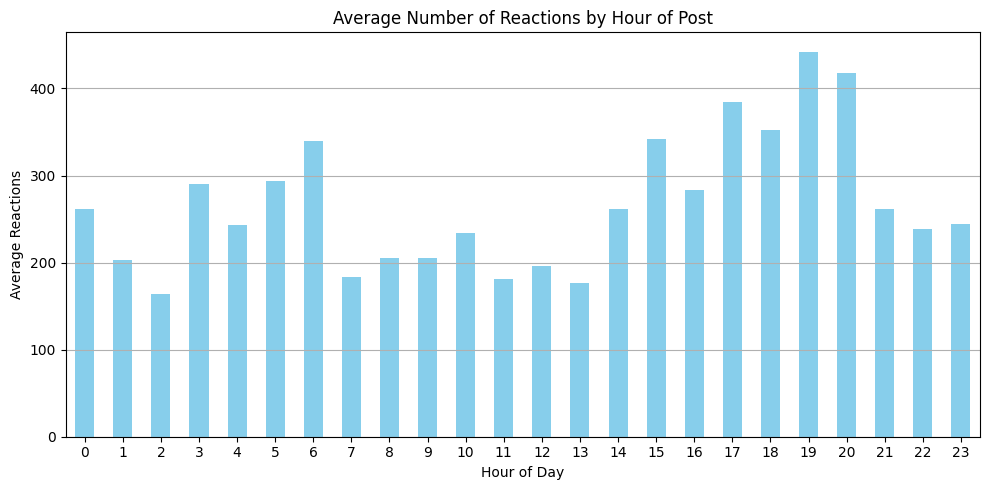

In [3]:
# Convert 'status_published' to datetime and extract hour
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')
df['publish_hour'] = df['status_published'].dt.hour

# Average reactions by hour
hourly_reactions = df.groupby('publish_hour')['num_reactions'].mean()

# Plot
plt.figure(figsize=(10,5))
hourly_reactions.plot(kind='bar', color='skyblue')
plt.title('Average Number of Reactions by Hour of Post')
plt.xlabel('Hour of Day')
plt.ylabel('Average Reactions')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Correlation Between 'num_reactions', 'num_comments', 'num_shares'

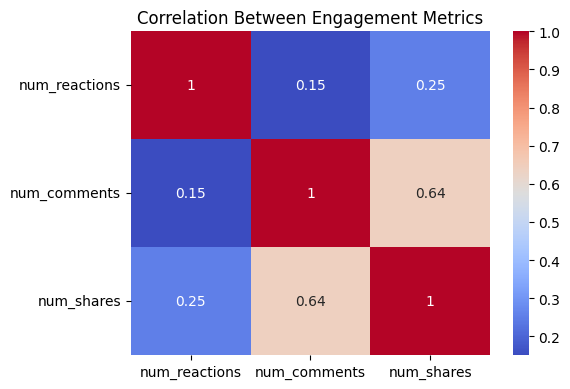

In [4]:
engagement_metrics = ['num_reactions', 'num_comments', 'num_shares']
correlation = df[engagement_metrics].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Engagement Metrics')
plt.tight_layout()
plt.show()

## 3. K-Means Clustering

In [5]:
features = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
            'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# One-hot encode 'status_type'
df_encoded = pd.get_dummies(df[features], columns=['status_type'])

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled_data)

## 4. Elbow Method for Optimal Clusters

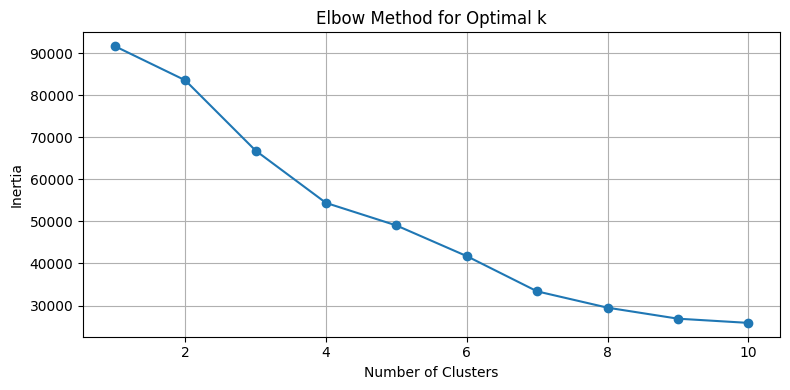

In [6]:
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,4))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Count of Different Types of Posts

In [7]:
post_type_counts = df['status_type'].value_counts()
print("Post type counts:")
print(post_type_counts)

Post type counts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


## 6. Average Metrics per Post Type

In [8]:
avg_metrics = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print("Average reactions, comments, and shares per post type:")
print(avg_metrics)

Average reactions, comments, and shares per post type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
